# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [140]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [141]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [142]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [143]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

In [144]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

In [145]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares/total_rides

In [146]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares / total_drivers

In [147]:
#  6. Create a PyBer summary DataFrame. 
data = [total_rides, total_drivers, total_fares,avg_fare_per_ride,avg_fare_per_driver]
pyber_summary_df = pd.DataFrame(data).transpose()
pyber_summary_df = pyber_summary_df.rename(columns={'ride_id': 'Total Rides', 'driver_count': 'Total Drivers','fare':'Total Fares','Unnamed 0':'Average Fare per Ride','Unnamed 1':'Average Fare per Driver'})

In [148]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [149]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,.0f}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,.0f}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [150]:
# 1. Read the merged DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [151]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
daily_fare_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

In [152]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
daily_fare_df = daily_fare_df.reset_index()

In [153]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
daily_fare_pivot = daily_fare_df.pivot(index=['date'], columns=['type'], values=['fare'])

In [154]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
jan_apr_fare_df = daily_fare_pivot.loc['2019-01-01':'2019-04-28']


In [155]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_apr_fare_df.index = pd.to_datetime(jan_apr_fare_df.index)

In [156]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_apr_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  567 non-null    float64
 2   (fare, Urban)     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [157]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fare_df = jan_apr_fare_df.resample('W').sum()
weekly_fare_df

fare                  
type         Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1169.04  1909.51

C:\Users\Drew\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


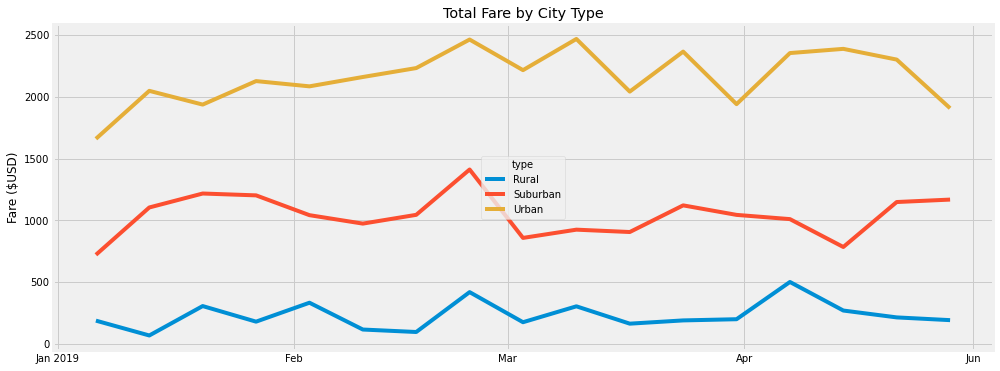

In [158]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(weekly_fare_df)

ax.legend( ('Rural', 'Suburban', 'Urban'), loc='center', title='type')
ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($USD)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_xticklabels(['Jan 2019', 'Feb','Mar','Apr','Jun'])
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig.savefig('analysis/PyBer_fare_summary.png')